In [580]:
import pandas as pd
import numpy as np
import duckdb

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

db = duckdb.connect() # No need to pass a file name, we will use a VIEW


In [581]:

db.execute('''
           DROP TABLE IF EXISTS SCHOOLS_ALL_DATA;
           CREATE TABLE SCHOOLS_ALL_DATA AS 
                SELECT 
                    'schools' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Full time equivalent number of pupils in school" "FTE Students",
                    s."% of pupils eligible for FSM" / 100 as "Percent Students FSM",
                    s."% of pupils with EHCP" / 100  "Percent Students EHCP",
                    s."% of pupils with SEN support" / 100 "Percent Students SEN",
                    s."% of pupils with English as an additional language" / 100 "Percent Students ESL",
                    s."FTE Number of teachers" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff" "Supply Staff Costs",
                    s."Education support staff",
                    s."Staff Total" "Total Staff Costs",
                    s."Maintenance & Improvement" "Maintenance & Improvement Costs",
                    s."Energy",
                    s."Educational Supplies" "Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    a.READPROG_19,
                    a.WRITPROG_19,
                    a.MATPROG_19,
                    a.READPROG_22,
                    a.WRITPROG_22,
                    a.MATPROG_22,
                    a.READPROG,
                    a.WRITPROG,
                    a.MATPROG
                    FROM parquet_scan('data/duck/schools_finance.parquet') as s
                    JOIN parquet_scan('data/duck/schools_attainment.parquet') as a
                    ON (s.URN = a.URN)
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                UNION
                SELECT 
                    'academies' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Number of pupils in academy (FTE)"  "FTE Students",
                    (s."% of pupils eligible for FSM") / 100 as "Percent Students FSM",
                    (s."% of pupils with an EHCP") / 100  "Percent Students EHCP",
                    (s."% of pupils with SEN support") / 100 "Percent Students SEN",
                    (s."% of pupils with English as an additional language" / 100) "Percent Students ESL",
                    s."Number of teachers in academy (FTE)" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff Costs",
                    s."Education support staff",
                    s."Total Staff Costs",
                    s."Maintenance & Improvement Costs",
                    s."Energy",
                    s."Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    NULL READPROG_19,
                    NULL WRITPROG_19,
                    NULL MATPROG_19,
                    NULL READPROG_22,
                    NULL WRITPROG_22,
                    NULL MATPROG_22,
                    a.READ_PROGSCORE_EM_ADJ_WGTAVG READPROG,
                    a.WRIT_PROGSCORE_EM_ADJ_WGTAVG WRITPROG,
                    a.MAT_PROGSCORE_EM_ADJ_WGTAVG MATPROG
                    FROM parquet_scan('data/duck/academies_finance.parquet') as s
                    JOIN parquet_scan('data/duck/academies_attainment.parquet') as a
                    ON (s.UID = a.TRUST_UID)
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                
           ''')

df = db.query("SELECT * FROM SCHOOLS_ALL_DATA").to_df()
#df['Progress'] = (df['READPROG_19'] + df['WRITPROG_19'] + df['MATPROG_19']) / 3
df


,Source,URN,Region,London Borough,School Name,Type,Overall Phase,...,MATPROG_19,READPROG_22,WRITPROG_22,MATPROG_22,READPROG,WRITPROG,MATPROG
0,schools,100013.0,London,Inner,Edith Neville Primary School,Community school,Primary,...,3.0,NaN,NaN,NaN,2.3,3.0,3.1
1,schools,100021.0,London,Inner,Rhyl Community Primary School,Community school,Primary,...,1.2,NaN,NaN,NaN,0.5,0.6,-0.2
2,schools,100023.0,London,Inner,Torriano Primary School,Community school,Primary,...,3.2,NaN,NaN,NaN,3.9,1.8,1.7
3,schools,130342.0,London,Inner,Christopher Hatton Primary School,Community school,Primary,...,3.6,NaN,NaN,NaN,2.3,1.6,2.3
4,schools,100031.0,London,Inner,Hampstead Parochial Church of England Primary School,Voluntary aided school,Primary,...,4.6,NaN,NaN,NaN,4.0,5.9,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899,schools,120539.0,East Midlands,Neither,Swinderby All Saints Church of England Primary School,Voluntary controlled school,Primary,...,-3.6,NaN,NaN,NaN,2.3,0.7,3.4
8900,schools,120859.0,East of England,Neither,St William's Primary School,Community school,Primary,...,-1.9,NaN,NaN,NaN,-0.8,-4.1,-3.5
8901,schools,121053.0,East of England,Neither,Salhouse CofE Primary School,Voluntary controlled school,Primary,...,-4.9,NaN,NaN,NaN,-3.1,-0.8,-5.1
8902,schools,123177.0,South East,Neither,St Swithun's CofE Primary School,Voluntary controlled school,Primary,...,-2.0,NaN,NaN,NaN,2.2,-0.6,0.1


In [582]:
# Determine how financial prudance is measured in the education sector
# Total income, total expenditure, pupil numbers
 
df[['URN', 'School Name', 'Region', 'FTE Students', 'Total Income', 'Total Expenditure']]
df["Income per Student"] = df['Total Income'] / df['FTE Students']
df["Expenditure per Student"] = df['Total Expenditure'] / df['FTE Students']
df


,Source,URN,Region,London Borough,School Name,Type,Overall Phase,...,WRITPROG_22,MATPROG_22,READPROG,WRITPROG,MATPROG,Income per Student,Expenditure per Student
0,schools,100013.0,London,Inner,Edith Neville Primary School,Community school,Primary,...,NaN,NaN,2.3,3.0,3.1,9863.296382,9865.245226
1,schools,100021.0,London,Inner,Rhyl Community Primary School,Community school,Primary,...,NaN,NaN,0.5,0.6,-0.2,12404.343285,11204.002847
2,schools,100023.0,London,Inner,Torriano Primary School,Community school,Primary,...,NaN,NaN,3.9,1.8,1.7,8556.463614,8983.174074
3,schools,130342.0,London,Inner,Christopher Hatton Primary School,Community school,Primary,...,NaN,NaN,2.3,1.6,2.3,8880.557358,8890.723113
4,schools,100031.0,London,Inner,Hampstead Parochial Church of England Primary School,Voluntary aided school,Primary,...,NaN,NaN,4.0,5.9,6.6,7088.293824,7780.348186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899,schools,120539.0,East Midlands,Neither,Swinderby All Saints Church of England Primary School,Voluntary controlled school,Primary,...,NaN,NaN,2.3,0.7,3.4,7343.909518,7568.487108
8900,schools,120859.0,East of England,Neither,St William's Primary School,Community school,Primary,...,NaN,NaN,-0.8,-4.1,-3.5,5907.276135,5775.812101
8901,schools,121053.0,East of England,Neither,Salhouse CofE Primary School,Voluntary controlled school,Primary,...,NaN,NaN,-3.1,-0.8,-5.1,6571.176232,6598.271087
8902,schools,123177.0,South East,Neither,St Swithun's CofE Primary School,Voluntary controlled school,Primary,...,NaN,NaN,2.2,-0.6,0.1,5412.555638,5471.925204


<Axes: xlabel='Total Income', ylabel='Total Expenditure'>

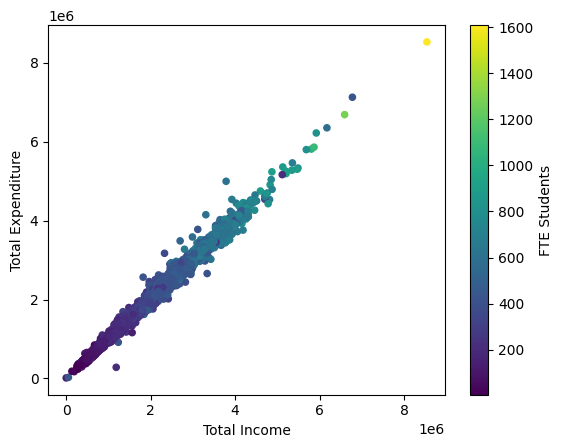

In [583]:
df.loc[(df['Overall Phase'] == 'Primary') & (df['Region'] != 'London')].plot.scatter(x='Total Income', y='Total Expenditure', c='FTE Students')

In [584]:

df['IE Ratio'] = (df['Total Expenditure'] / df['Total Income'])

print('Mean IE Ratio:', df['IE Ratio'].mean())
print('Median IE Ratio:', df['IE Ratio'].median())
print('Min IE Ratio:', df['IE Ratio'].min())
print('Max IE Ratio:', df['IE Ratio'].max())

print('STD IE Ratio:', df['IE Ratio'].std())

Mean IE Ratio: 1.0114238465972691
Median IE Ratio: 1.009340273848573
Min IE Ratio: 0.23832802609652762
Max IE Ratio: 6.470858165060909
STD IE Ratio: 0.07403990295930242


In [585]:
test = df[~pd.to_numeric(df['READPROG'], errors='coerce').isnull()]
test = test[~pd.to_numeric(test['WRITPROG'], errors='coerce').isnull()]
test = test[~pd.to_numeric(test['MATPROG'], errors='coerce').isnull()]
test['PROG'] = (test['READPROG'] + test['WRITPROG'] + test['MATPROG']) / 3

In [586]:
test['Student Buckets'] = pd.cut(test['FTE Students'], [0,200,400,600,800,1000,1200,1400,10000])
def bucket_data(col, df):
    test[col + ' Ratio'] = test[col] / test['Total Expenditure']

In [587]:
bucket_data('Teaching Staff', test)
bucket_data('Supply Staff Costs', test)
bucket_data('Education support staff', test)
bucket_data('Total Staff Costs', test)
bucket_data('Maintenance & Improvement Costs', test)
bucket_data('Energy', test)
bucket_data('Total Costs of Educational Supplies', test)
bucket_data('Catering supplies', test)

test

,Source,URN,Region,London Borough,School Name,Type,Overall Phase,...,Supply Staff Costs Ratio,Education support staff Ratio,Total Staff Costs Ratio,Maintenance & Improvement Costs Ratio,Energy Ratio,Total Costs of Educational Supplies Ratio,Catering supplies Ratio
0,schools,100013.0,London,Inner,Edith Neville Primary School,Community school,Primary,...,0.051954,0.122866,0.651272,0.014932,0.021729,0.034150,0.035609
1,schools,100021.0,London,Inner,Rhyl Community Primary School,Community school,Primary,...,0.017922,0.239155,0.782522,0.017752,0.019477,0.028165,0.029760
2,schools,100023.0,London,Inner,Torriano Primary School,Community school,Primary,...,0.018978,0.166824,0.658296,0.025528,0.011242,0.041968,0.036772
3,schools,130342.0,London,Inner,Christopher Hatton Primary School,Community school,Primary,...,0.027337,0.208316,0.737469,0.015256,0.015016,0.033661,0.039668
4,schools,100031.0,London,Inner,Hampstead Parochial Church of England Primary School,Voluntary aided school,Primary,...,0.012305,0.154857,0.722054,0.024836,0.012631,0.084533,0.036369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899,schools,120539.0,East Midlands,Neither,Swinderby All Saints Church of England Primary School,Voluntary controlled school,Primary,...,0.019771,0.198554,0.762785,0.016443,0.017282,0.057446,0.028397
8900,schools,120859.0,East of England,Neither,St William's Primary School,Community school,Primary,...,0.024296,0.187562,0.739056,0.024371,0.019987,0.056658,0.041534
8901,schools,121053.0,East of England,Neither,Salhouse CofE Primary School,Voluntary controlled school,Primary,...,0.029711,0.205056,0.604324,0.029981,0.011660,0.034409,0.046332
8902,schools,123177.0,South East,Neither,St Swithun's CofE Primary School,Voluntary controlled school,Primary,...,0.011162,0.226165,0.750075,0.036945,0.018583,0.059668,0.057902


<Axes: xlabel='IE Ratio', ylabel='PROG'>

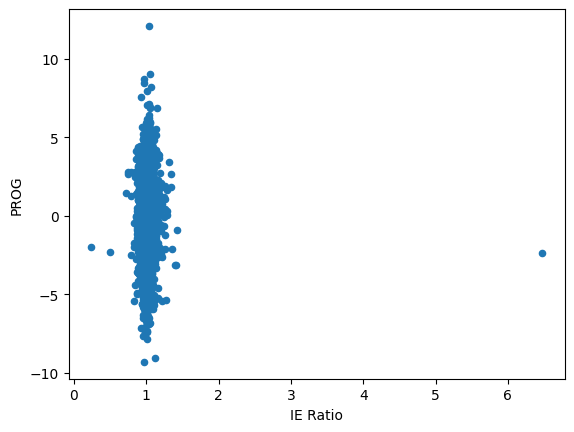

In [588]:

test.plot.scatter(x='IE Ratio', y='PROG')

<Axes: xlabel='Income per Student', ylabel='PROG'>

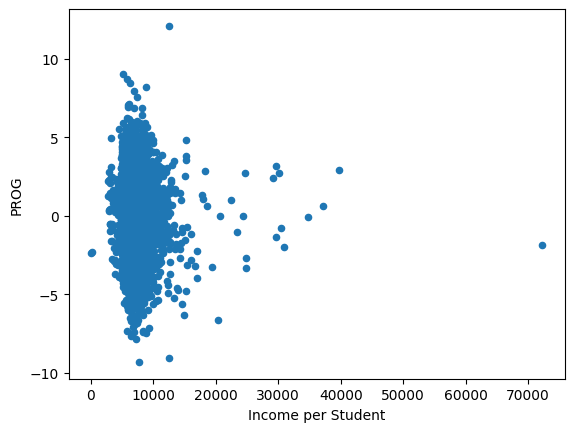

In [589]:
test.plot.scatter(x='Income per Student', y='PROG')

<Axes: xlabel='Expenditure per Student', ylabel='PROG'>

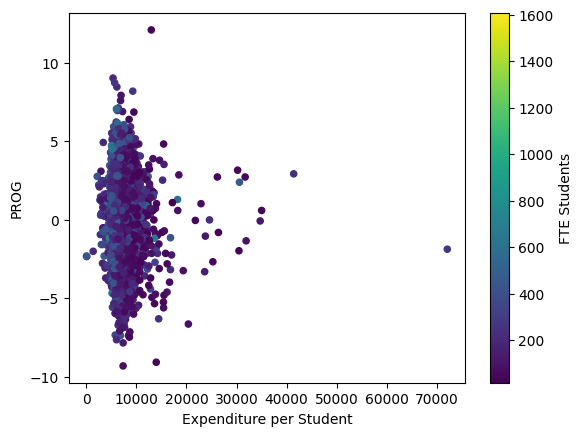

In [590]:
test.plot.scatter(x='Expenditure per Student', y='PROG', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Teaching Staff'>

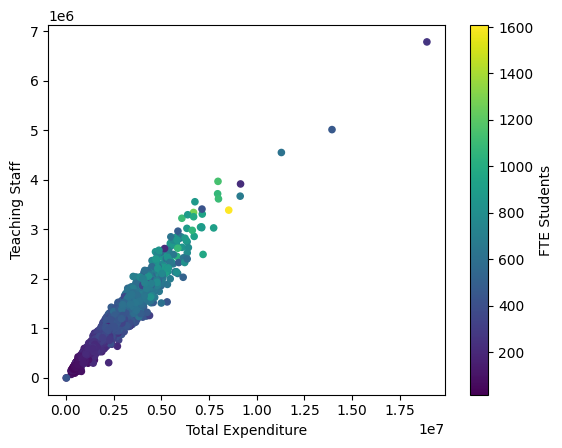

In [591]:
test.plot.scatter(x='Total Expenditure', y='Teaching Staff', c='FTE Students')

In [592]:
def show_stats (col):
    agg_func_math = {
        col + ' Ratio':
        ['mean', 'median', 'min', 'max', 'std', 'var']
    }
    return test[test[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)

show_stats('Teaching Staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_33200/860692847.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return test[test[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Teaching Staff Ratio                              
                                mean median   min   max   std  var
Student Buckets                                                   
(0, 200]                        0.45   0.45  0.16  0.67  0.05  0.0
(200, 400]                      0.45   0.45  0.14  0.60  0.05  0.0
(400, 600]                      0.45   0.45  0.29  0.60  0.04  0.0
(600, 800]                      0.45   0.45  0.30  0.58  0.04  0.0
(800, 1000]                     0.45   0.45  0.35  0.54  0.05  0.0
(1000, 1200]                    0.47   0.45  0.42  0.53  0.04  0.0
(1200, 1400]                    0.50   0.50  0.50  0.50   NaN  NaN
(1400, 10000]                   0.40   0.40  0.40  0.40   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Supply Staff Costs'>

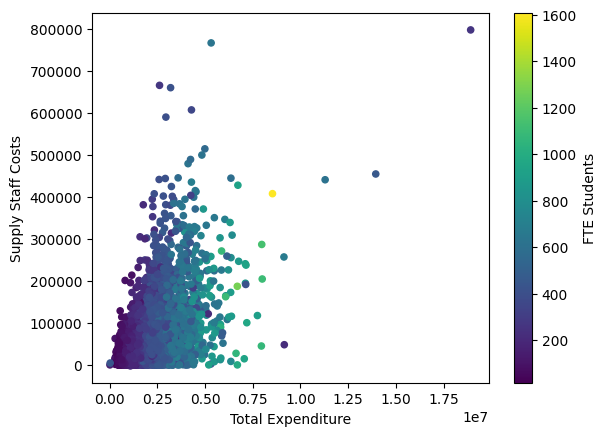

In [593]:
                    
test.plot.scatter(x='Total Expenditure', y='Supply Staff Costs', c='FTE Students')

In [594]:
show_stats('Supply Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_33200/860692847.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return test[test[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Supply Staff Costs Ratio                              
                                    mean median   min   max   std  var
Student Buckets                                                       
(0, 200]                            0.03   0.02  0.00  0.25  0.02  0.0
(200, 400]                          0.03   0.02  0.00  0.25  0.02  0.0
(400, 600]                          0.03   0.02  0.00  0.21  0.02  0.0
(600, 800]                          0.03   0.02  0.00  0.14  0.02  0.0
(800, 1000]                         0.03   0.03  0.00  0.08  0.02  0.0
(1000, 1200]                        0.02   0.03  0.00  0.05  0.02  0.0
(1200, 1400]                        0.03   0.03  0.03  0.03   NaN  NaN
(1400, 10000]                       0.05   0.05  0.05  0.05   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Education support staff'>

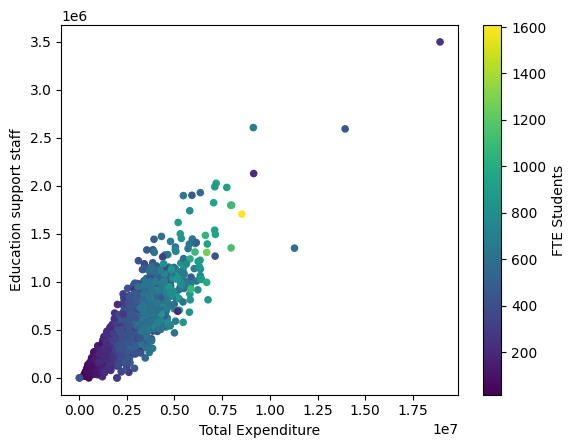

In [595]:

test.plot.scatter(x='Total Expenditure', y='Education support staff', c='FTE Students')

In [596]:
show_stats('Education support staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_33200/860692847.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return test[test[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Education support staff Ratio                              
                                         mean median   min   max   std  var
Student Buckets                                                            
(0, 200]                                 0.17   0.17  0.01  0.35  0.04  0.0
(200, 400]                               0.19   0.19  0.00  0.38  0.04  0.0
(400, 600]                               0.20   0.20  0.03  0.39  0.05  0.0
(600, 800]                               0.20   0.20  0.07  0.35  0.04  0.0
(800, 1000]                              0.19   0.19  0.11  0.31  0.05  0.0
(1000, 1200]                             0.20   0.22  0.16  0.23  0.03  0.0
(1200, 1400]                             0.20   0.20  0.20  0.20   NaN  NaN
(1400, 10000]                            0.20   0.20  0.20  0.20   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Staff Costs'>

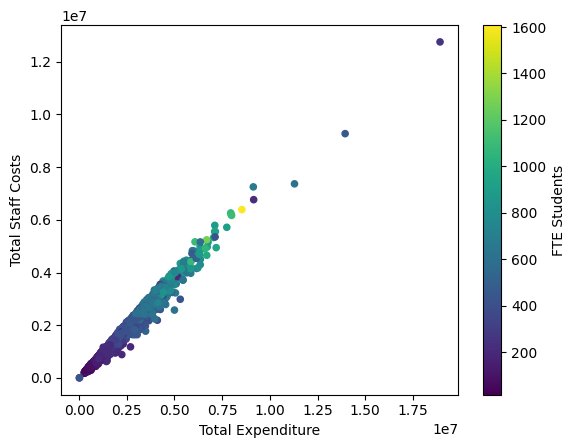

In [597]:

test.plot.scatter(x='Total Expenditure', y='Total Staff Costs', c='FTE Students')

In [598]:
show_stats('Total Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_33200/860692847.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return test[test[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Staff Costs Ratio                              
                                   mean median   min   max   std  var
Student Buckets                                                      
(0, 200]                           0.73   0.74  0.44  0.87  0.05  0.0
(200, 400]                         0.74   0.75  0.40  0.92  0.04  0.0
(400, 600]                         0.75   0.76  0.29  0.87  0.04  0.0
(600, 800]                         0.76   0.76  0.52  0.85  0.04  0.0
(800, 1000]                        0.76   0.76  0.67  0.82  0.04  0.0
(1000, 1200]                       0.77   0.77  0.72  0.85  0.04  0.0
(1200, 1400]                       0.78   0.78  0.78  0.78   NaN  NaN
(1400, 10000]                      0.75   0.75  0.75  0.75   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Maintenance & Improvement Costs'>

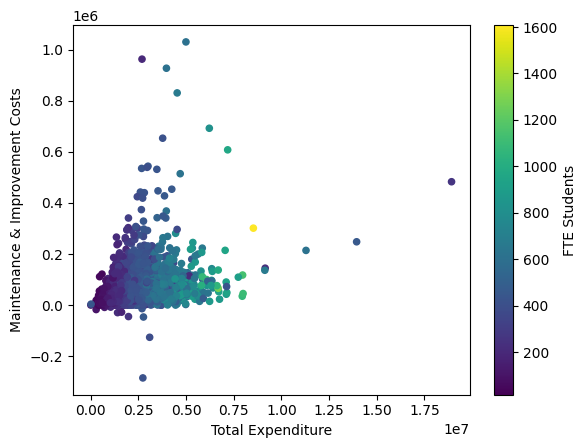

In [599]:

test.plot.scatter(x='Total Expenditure', y='Maintenance & Improvement Costs', c='FTE Students')

In [600]:
show_stats('Maintenance & Improvement Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_33200/860692847.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return test[test[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Maintenance & Improvement Costs Ratio                     \
                                                 mean median   min   max   
Student Buckets                                                            
(0, 200]                                         0.02   0.02  0.00  0.23   
(200, 400]                                       0.02   0.02  0.00  0.36   
(400, 600]                                       0.02   0.02  0.00  0.20   
(600, 800]                                       0.02   0.01  0.00  0.23   
(800, 1000]                                      0.02   0.01  0.00  0.11   
(1000, 1200]                                     0.01   0.01  0.00  0.02   
(1200, 1400]                                     0.01   0.01  0.01  0.01   
(1400, 10000]                                    0.04   0.04  0.04  0.04   

                            
                  std  var  
Student Buckets             
(0, 200]         0.02  0.0  
(200, 400]       0.02  0.0  
(400, 600]       0.02  0.0  
(600, 800]       0.02  0.0  
(800, 1000]      0.02  0.0  
(1000, 1200]     0.01  0.0  
(1200, 1400]      NaN  NaN  
(1400, 10000]     NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Energy'>

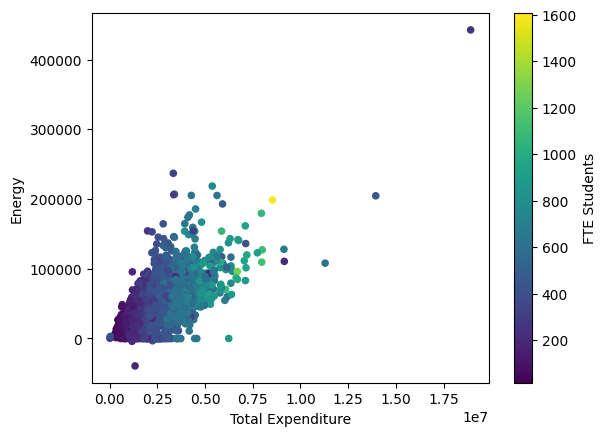

In [601]:

test.plot.scatter(x='Total Expenditure', y='Energy', c='FTE Students')

In [602]:
show_stats('Energy')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_33200/860692847.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return test[test[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Energy Ratio                              
                        mean median   min   max   std  var
Student Buckets                                           
(0, 200]                0.02   0.02  0.00  0.08  0.01  0.0
(200, 400]              0.02   0.02  0.00  0.08  0.01  0.0
(400, 600]              0.02   0.02  0.00  0.11  0.01  0.0
(600, 800]              0.02   0.02  0.00  0.05  0.01  0.0
(800, 1000]             0.02   0.02  0.01  0.04  0.01  0.0
(1000, 1200]            0.02   0.02  0.01  0.03  0.01  0.0
(1200, 1400]            0.01   0.01  0.01  0.01   NaN  NaN
(1400, 10000]           0.02   0.02  0.02  0.02   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Costs of Educational Supplies'>

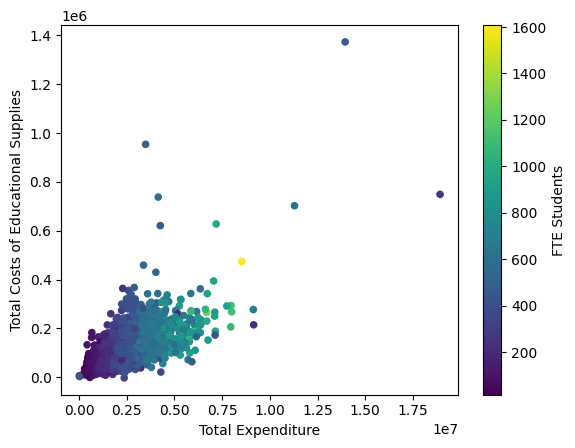

In [603]:

test.plot.scatter(x='Total Expenditure', y='Total Costs of Educational Supplies', c='FTE Students')

In [604]:
show_stats('Total Costs of Educational Supplies')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_33200/860692847.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return test[test[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Costs of Educational Supplies Ratio                     \
                                                     mean median   min   max   
Student Buckets                                                                
(0, 200]                                             0.06   0.06  0.01  0.41   
(200, 400]                                           0.05   0.05  0.00  0.16   
(400, 600]                                           0.05   0.05  0.01  0.27   
(600, 800]                                           0.04   0.04  0.01  0.18   
(800, 1000]                                          0.04   0.03  0.02  0.09   
(1000, 1200]                                         0.03   0.03  0.03  0.05   
(1200, 1400]                                         0.04   0.04  0.04  0.04   
(1400, 10000]                                        0.06   0.06  0.06  0.06   

                            
                  std  var  
Student Buckets             
(0, 200]         0.02  0.0  
(200, 400]       0.02  0.0  
(400, 600]       0.02  0.0  
(600, 800]       0.02  0.0  
(800, 1000]      0.01  0.0  
(1000, 1200]     0.01  0.0  
(1200, 1400]      NaN  NaN  
(1400, 10000]     NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Catering supplies'>

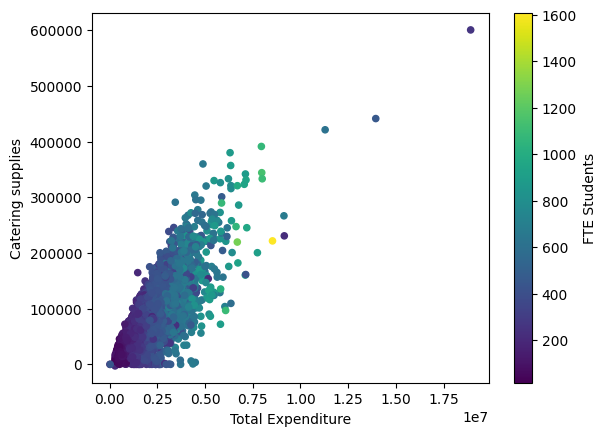

In [605]:

test.plot.scatter(x='Total Expenditure', y='Catering supplies', c='FTE Students')

In [606]:
show_stats("Catering supplies")

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_33200/860692847.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return test[test[col + ' Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Catering supplies Ratio                              
                                   mean median   min   max   std  var
Student Buckets                                                      
(0, 200]                           0.04   0.04  0.00  0.09  0.01  0.0
(200, 400]                         0.04   0.04  0.00  0.11  0.01  0.0
(400, 600]                         0.04   0.04  0.00  0.08  0.01  0.0
(600, 800]                         0.04   0.04  0.00  0.08  0.01  0.0
(800, 1000]                        0.04   0.04  0.01  0.06  0.01  0.0
(1000, 1200]                       0.04   0.04  0.02  0.05  0.01  0.0
(1200, 1400]                       0.03   0.03  0.03  0.03   NaN  NaN
(1400, 10000]                      0.03   0.03  0.03  0.03   NaN  NaN

In [607]:
test

,Source,URN,Region,London Borough,School Name,Type,Overall Phase,...,Supply Staff Costs Ratio,Education support staff Ratio,Total Staff Costs Ratio,Maintenance & Improvement Costs Ratio,Energy Ratio,Total Costs of Educational Supplies Ratio,Catering supplies Ratio
0,schools,100013.0,London,Inner,Edith Neville Primary School,Community school,Primary,...,0.051954,0.122866,0.651272,0.014932,0.021729,0.034150,0.035609
1,schools,100021.0,London,Inner,Rhyl Community Primary School,Community school,Primary,...,0.017922,0.239155,0.782522,0.017752,0.019477,0.028165,0.029760
2,schools,100023.0,London,Inner,Torriano Primary School,Community school,Primary,...,0.018978,0.166824,0.658296,0.025528,0.011242,0.041968,0.036772
3,schools,130342.0,London,Inner,Christopher Hatton Primary School,Community school,Primary,...,0.027337,0.208316,0.737469,0.015256,0.015016,0.033661,0.039668
4,schools,100031.0,London,Inner,Hampstead Parochial Church of England Primary School,Voluntary aided school,Primary,...,0.012305,0.154857,0.722054,0.024836,0.012631,0.084533,0.036369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899,schools,120539.0,East Midlands,Neither,Swinderby All Saints Church of England Primary School,Voluntary controlled school,Primary,...,0.019771,0.198554,0.762785,0.016443,0.017282,0.057446,0.028397
8900,schools,120859.0,East of England,Neither,St William's Primary School,Community school,Primary,...,0.024296,0.187562,0.739056,0.024371,0.019987,0.056658,0.041534
8901,schools,121053.0,East of England,Neither,Salhouse CofE Primary School,Voluntary controlled school,Primary,...,0.029711,0.205056,0.604324,0.029981,0.011660,0.034409,0.046332
8902,schools,123177.0,South East,Neither,St Swithun's CofE Primary School,Voluntary controlled school,Primary,...,0.011162,0.226165,0.750075,0.036945,0.018583,0.059668,0.057902
